<img src=https://jupyter.org/assets/main-logo.svg width="300">

[Jupyter](https://jupyter.org/)

# 1. Laden der Packages und des Datensets

## 1.1. Laden der Packages

In [1]:
# Laden der Packages
import pandas as pd 
import numpy as np
import pickle
import re          
import matplotlib.pyplot as plt 
%matplotlib inline   
from matplotlib import pyplot

from xgboost import XGBClassifier 
import seaborn as sns  
import sklearn         
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

## 1.2. Laden des Datensets

In [2]:
# Laden der  CSV Files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
full_data = [train, test]

# Speichern der PassengerID 
PassengerId = test['PassengerId']

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [4]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S


**Datentypen jedes Features**
* Survived: int
* Pclass: int
* Name: string
* Sex: string
* Age: float
* SibSp: int
* Parch: int
* Ticket: string
* Fare: float
* Cabin: string
* Embarked: string

## 1.3. Ziel
**Die Survived Variable** ist die Ausgabe und kann 1 für "survived" und 0 für "did not survive" sein.

**Die anderen Variablen** sind potentielle Indikatoren, um die Survived Variable zubestimmen.

## 1.4. Erste Sichtung der Daten

Text(0.5, 1.0, 'Überlebensrate nach Hafen')

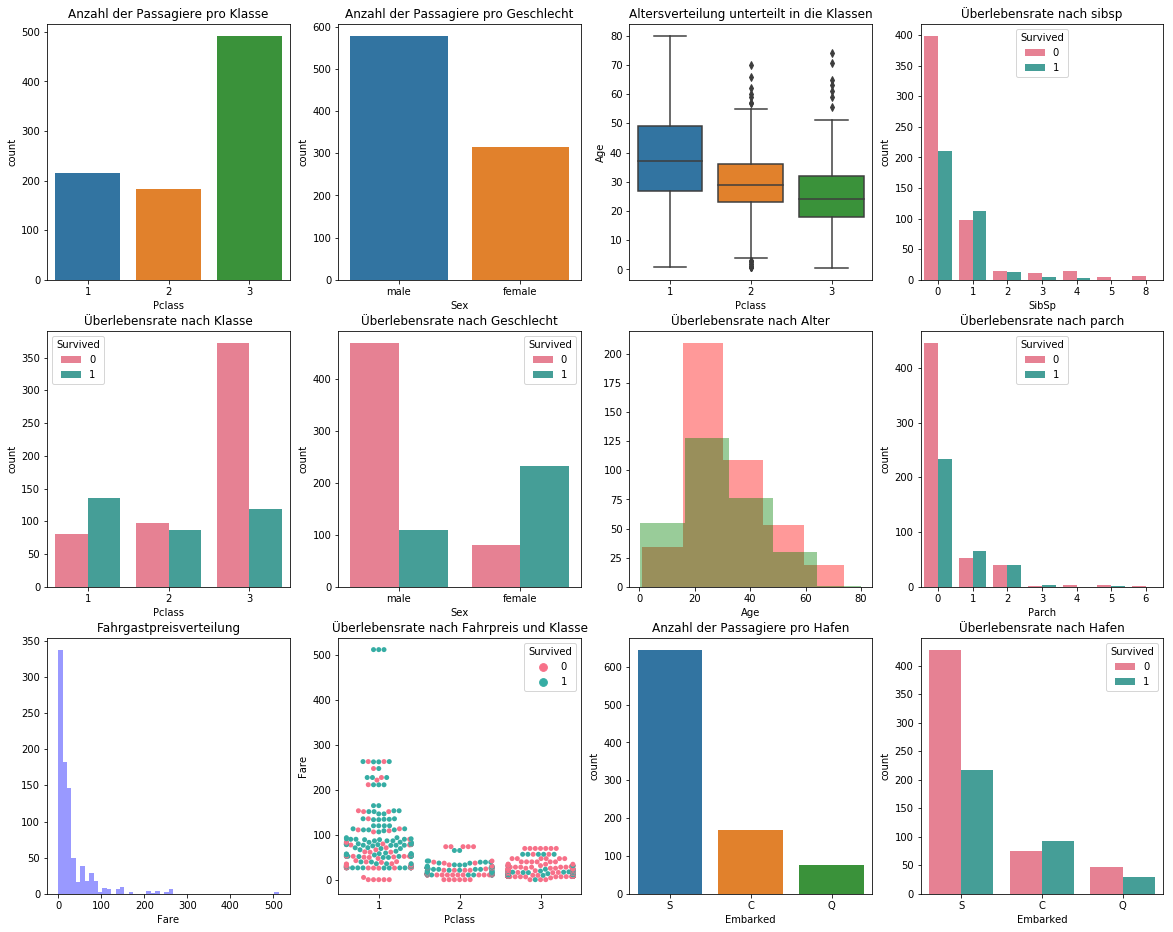

In [5]:
f,ax = plt.subplots(3,4,figsize=(20,16))
sns.countplot('Pclass',data=train,ax=ax[0,0])
sns.countplot('Sex',data=train,ax=ax[0,1])
sns.boxplot(x='Pclass',y='Age',data=train,ax=ax[0,2])
sns.countplot('SibSp',hue='Survived',data=train,ax=ax[0,3],palette='husl')
sns.distplot(train['Fare'].dropna(),ax=ax[2,0],kde=False,color='b')
sns.countplot('Embarked',data=train,ax=ax[2,2])

sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1,0],palette='husl')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1,1],palette='husl')
sns.distplot(train[train['Survived']==0]['Age'].dropna(),ax=ax[1,2],kde=False,color='r',bins=5)
sns.distplot(train[train['Survived']==1]['Age'].dropna(),ax=ax[1,2],kde=False,color='g',bins=5)
sns.countplot('Parch',hue='Survived',data=train,ax=ax[1,3],palette='husl')
sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=train,palette='husl',ax=ax[2,1])
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[2,3],palette='husl')

ax[0,0].set_title('Anzahl der Passagiere pro Klasse')
ax[0,1].set_title('Anzahl der Passagiere pro Geschlecht')
ax[0,2].set_title('Altersverteilung unterteilt in die Klassen')
ax[0,3].set_title('Überlebensrate nach sibsp')
ax[1,0].set_title('Überlebensrate nach Klasse')
ax[1,1].set_title('Überlebensrate nach Geschlecht')
ax[1,2].set_title('Überlebensrate nach Alter')
ax[1,3].set_title('Überlebensrate nach parch')
ax[2,0].set_title('Fahrgastpreisverteilung')
ax[2,1].set_title('Überlebensrate nach Fahrpreis und Klasse')
ax[2,2].set_title('Anzahl der Passagiere pro Hafen')
ax[2,3].set_title('Überlebensrate nach Hafen')

#### sibsp:

Geschwister = Bruder, Schwester, Stiefbruder, Stiefschwester

Ehepartner = Ehemann, Ehefrau

#### parch:

Eltern = Mutter, Vater

Kinder = Tochter, Sohn, Stieftochter, Stiefsohn

# 2. Datenvorbereitung

## 2.1. Feature Engineering

### Geschlecht 
- in Integer konvertieren

In [6]:
for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)    

### Alter

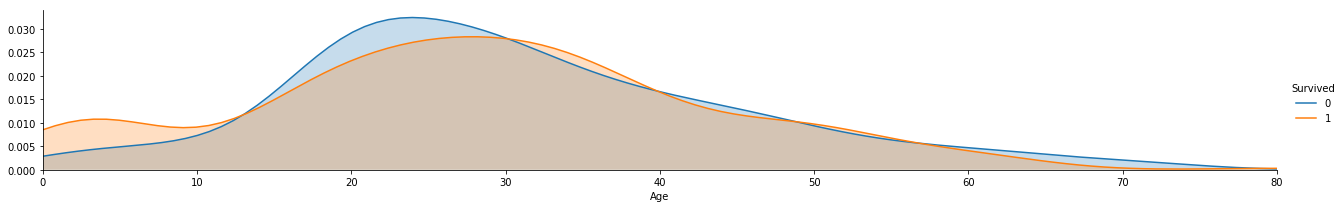

In [7]:
a = sns.FacetGrid( train, hue = 'Survived', aspect=6 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

Alterskategorien festlegen:
* 0:  jünger als 14
* 1:  14 bis 30
* 2:  31 bis 40
* 3:  41 bis 50
* 4:  51 bis 60
* 5:  älter als 60

In [8]:
for dataset in full_data:
    age_avg = dataset['Age'].median()
    dataset['Age'] = dataset['Age'].fillna(age_avg)
    dataset['Age'] = dataset['Age'].astype(int)

    dataset.loc[ dataset['Age'] <= 14, 'Age'] 						          = 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 30), 'Age']        = 5
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age']        = 1
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age']        = 3
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age']        = 2
    dataset.loc[ dataset['Age'] > 60, 'Age'] 							      = 4
train['Age'].value_counts()

5    510
1    155
3     84
0     78
2     42
4     22
Name: Age, dtype: int64

In [9]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0,0.576923
1,1,0.445161
2,2,0.404762
3,3,0.392857
5,5,0.339216
4,4,0.227273


### Familie: SibSp and Parch

Ziel: - neues Feature (Familiengröße) erstellen

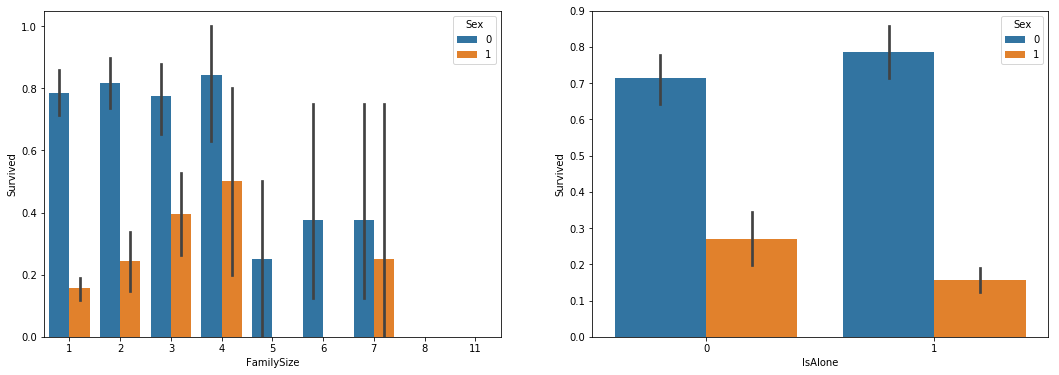

In [10]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']+1
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x="FamilySize", y="Survived", hue="Sex", data=train, ax = axis1);
sns.barplot(x="IsAlone", y="Survived", hue="Sex", data=train, ax = axis2);

### Fahrpreis

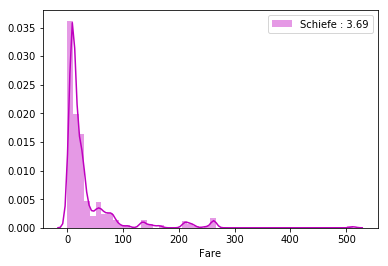

In [11]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

g = sns.distplot(dataset["Fare"], color="m", label="Schiefe : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

**Beobachtungen**
* Die Verteilung der Fahrpreise ist sehr ungleichmäßig verteilt. Daher wird der Fahrpreis mit der  Logarithmus Funktion transformiert.

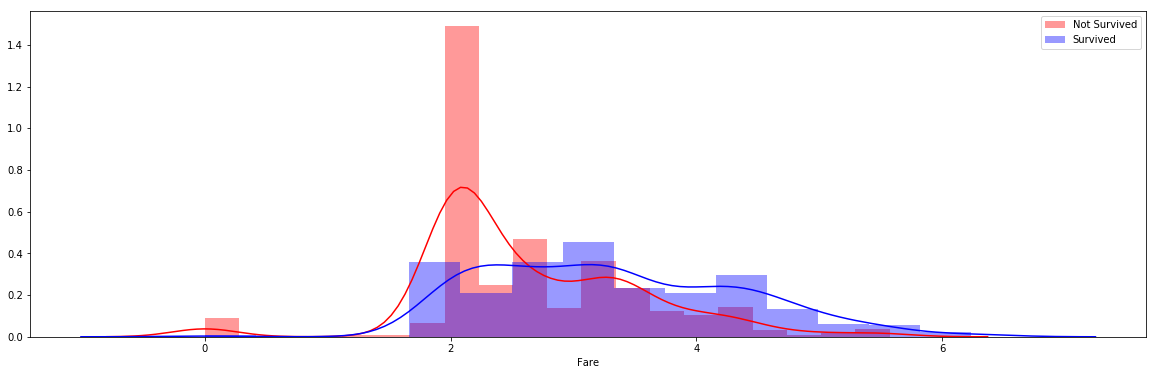

In [12]:
for dataset in full_data:
    dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
a4_dims = (20, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.distplot(train["Fare"][train["Survived"] == 0], color="r", label="Schiefe : %.2f"%(train["Fare"].skew()), ax=ax)
g = sns.distplot(train["Fare"][train["Survived"] == 1], color="b", label="Schiefe : %.2f"%(train["Fare"].skew()))

g = g.legend(["Not Survived","Survived"])

**Beobachtungen**
zwei Kategorien:
* 0 bis 2.7: weniger Überlebende
* Mehr als 2.7 mehr Überlebende

In [13]:
for dataset in full_data:
    dataset.loc[ dataset['Fare'] <= 2.7, 'Fare'] 						      = 0
    dataset.loc[ dataset['Fare'] > 2.7, 'Fare'] 							  = 1
    dataset['Fare'] = dataset['Fare'].astype(int)
train['Fare'].value_counts()

0    457
1    434
Name: Fare, dtype: int64

### Kabine

In [14]:
for dataset in full_data:
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

train[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).sum().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
0,0,206
1,1,136


In [15]:
train[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
1,1,0.666667
0,0,0.299854


* Has_Cabin hat scheinbar eine starke Auswirkung auf die Überlebensrate

### Hafen, wo die Passagiere eingestiegen sind

In [16]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

### Titel

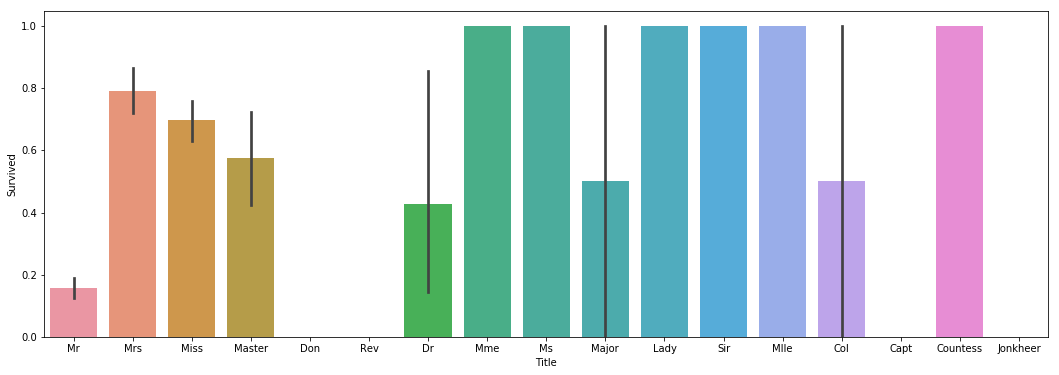

In [17]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

fig, (axis1) = plt.subplots(1,figsize=(18,6))
sns.barplot(x="Title", y="Survived", data=train, ax=axis1);

Titel:
0. Mme, Ms, Lady, Sir, Mlle, Countess: 100%. 
1. Mrs, Miss: around 70% survival
2. Master: around 60%
3. Don, Rev, Capt, Jonkheer: no data
4. Dr, Major, Col: around 40%
5. Mr: below 20%

In [18]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Mrs', 'Miss'], 'MM')
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Major', 'Col'], 'DMC')
    dataset['Title'] = dataset['Title'].replace(['Don', 'Rev', 'Capt', 'Jonkheer'],'DRCJ')
    dataset['Title'] = dataset['Title'].replace(['Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'Countess'],'MMLSMC' )
    
    title_mapping = {"MM": 1, "Master":2, "Mr": 5, "DMC": 4, "DRCJ": 3, "MMLSMC": 0}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(3)

### Herausfiltern des Decks vom Kabinennamen

Bsp: C123 - C ist das Deck und 123 die Kabinennummer

In [19]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
for dataset in full_data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 
train['Deck'].value_counts()

8    687
3     59
2     47
4     33
5     32
1     15
6     13
7      4
0      1
Name: Deck, dtype: int64

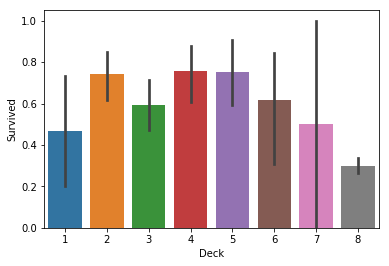

In [20]:
sns.barplot(x = 'Deck', y = 'Survived', order=[1,2,3,4,5,6,7,8], data=train)

3 Gruppen: 1 mit 15 Passagieren, 2 bis 6, und 7 bis 8 (mit den meisten Passagieren)

In [21]:
for dataset in full_data:
    dataset.loc[ dataset['Deck'] <= 1, 'Deck'] = 1
    dataset.loc[(dataset['Deck'] > 1) & (dataset['Deck'] <= 6), 'Deck']  = 3
    dataset.loc[ dataset['Deck'] > 6, 'Deck'] = 0
train[["Deck", "Survived"]].groupby(['Deck'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Deck,Survived
2,3,0.690217
1,1,0.437500
0,0,0.301013


## 2.2. Darstellung des bearbeiteten Datensets

In [22]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Has_Cabin,Title,Deck
0,892,3,"Kelly, Mr. James",1,1,0,0,330911,0,U0,2,1,1,0,5.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,3,1,0,363272,0,U0,0,2,0,0,1.0,0
2,894,2,"Myles, Mr. Thomas Francis",1,4,0,0,240276,0,U0,2,1,1,0,5.0,0
3,895,3,"Wirz, Mr. Albert",1,5,0,0,315154,0,U0,0,1,1,0,5.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,5,1,1,3101298,0,U0,0,3,0,0,1.0,0


In [23]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Has_Cabin,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,5,1,0,A/5 21171,0,U0,0,2,0,0,5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,1,C85,1,2,0,1,1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,5,0,0,STON/O2. 3101282,0,U0,0,1,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,1,C123,0,2,0,1,1,3
4,5,0,3,"Allen, Mr. William Henry",1,1,0,0,373450,0,U0,0,1,1,0,5,0


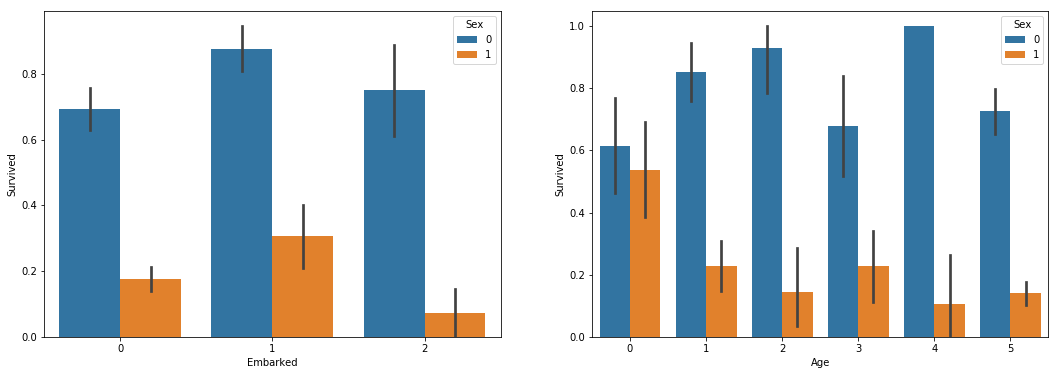

In [24]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train, ax = axis1);
sns.barplot(x="Age", y="Survived", hue="Sex", data=train, ax = axis2);

**Beobachtungen für den Altersgraphen:**
* 0 oder blau stellt Frauen dar; 1 oder orange Männer. Geschlecht und Alter beeinflussen die Überlebensrate stark.
* Meiste Überlebende: ältere Frauen (48 bis 64) und jüngere Passagiere.

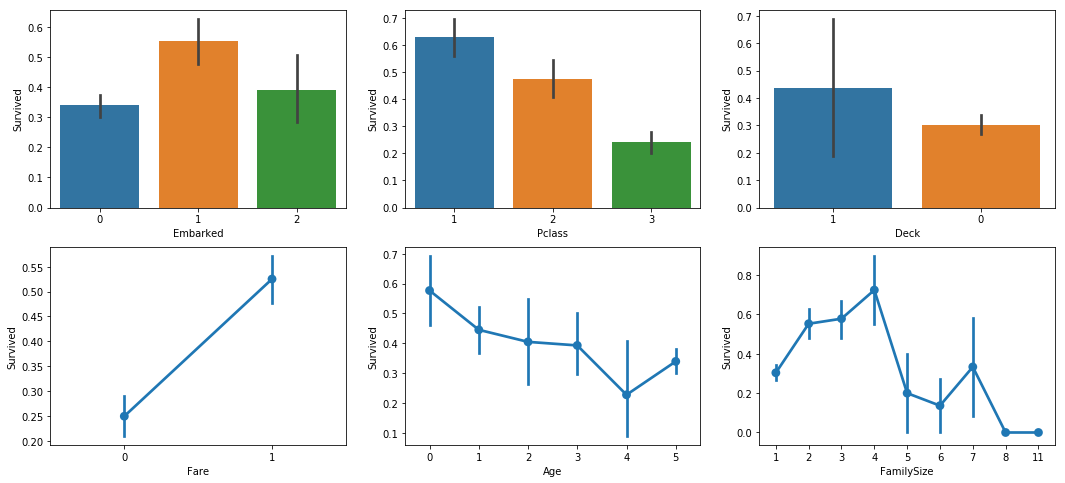

In [25]:
fig, saxis = plt.subplots(2, 3,figsize=(18,8))

sns.barplot(x = 'Embarked', y = 'Survived', data=train, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train, ax = saxis[0,1])
sns.barplot(x = 'Deck', y = 'Survived', order=[1,0], data=train, ax = saxis[0,2])

sns.pointplot(x = 'Fare', y = 'Survived',  data=train, ax = saxis[1,0])
sns.pointplot(x = 'Age', y = 'Survived',  data=train, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=train, ax = saxis[1,2])

C:\Users\Pitch\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Pitch\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Pitch\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


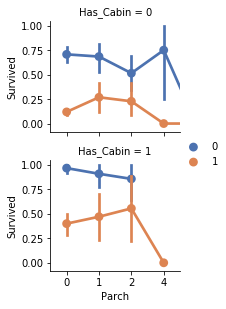

In [26]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train, row='Has_Cabin', size=2.2, aspect=1.2)
grid.map(sns.pointplot, 'Parch', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Beobachtungen:**
* blau=0 sind Frauen, orange=1 sind Männer
* Frauen haben im allgemeinen eine deutlich höhere Überlebenschance als Männer gehabt.

## 2.3. Entfernen von Features

In [27]:
# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Parch', 'IsAlone']

train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

In [28]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]

from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=101)

X_test = test.copy() # Testdaten für Kaggle

# 3. Erstellung von Modellen

In [29]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## 3.1 Random Forest

In [30]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest_predictions = random_forest.predict(x_test)
acc_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)
acc_random_forest

78.36

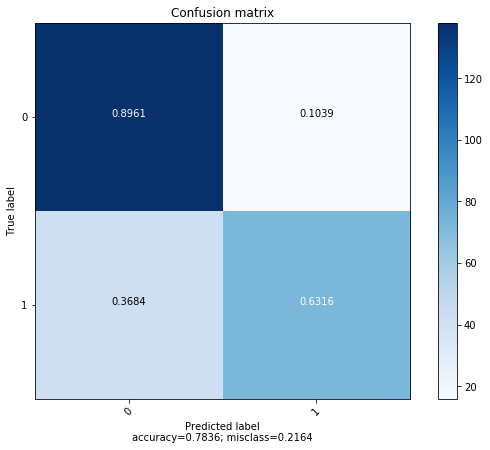

In [31]:
pred = random_forest.predict(x_test.values)
cm = confusion_matrix(y_test.values, pred)

plot_confusion_matrix(cm,[0,1],title='Confusion matrix',cmap=None,normalize=True)

## 3.2 XGBoost

In [32]:
xgboost_m = XGBClassifier(n_estimators=100)
xgboost_m.fit(X_train, Y_train)
xgboost_predictions = xgboost_m.predict(x_test)
acc_xgboost = round(xgboost_m.score(x_test, y_test) * 100, 2)
acc_xgboost

81.34

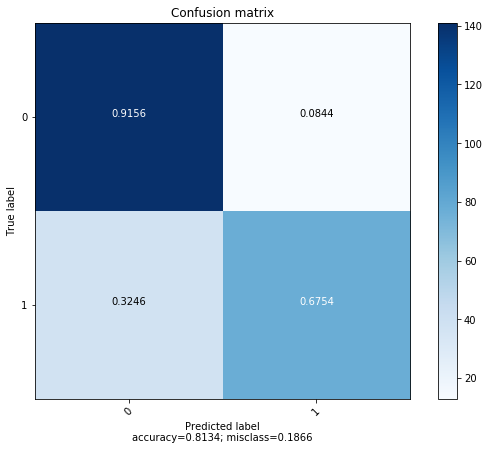

In [33]:
pred = xgboost_m.predict(x_test)
cm = confusion_matrix(y_test.values, pred)

plot_confusion_matrix(cm,[0,1],title='Confusion matrix',cmap=None,normalize=True)

## 3.3 Hyperparameter Tuning

## 3.3.1 Random Forest

In [34]:
# Random Forest
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 7],
              "min_samples_split": [2, 3, 7],
              "min_samples_leaf": [1, 3, 7],
              "bootstrap": [False],
              "n_estimators" :[300,600],
              "criterion": ["gini"]}
gsrandom_forest = RandomizedSearchCV(random_forest,param_distributions = rf_param_grid,n_iter=30, cv=3, scoring="accuracy", n_jobs= -1, verbose = 1)
gsrandom_forest.fit(X_train,Y_train)
# Best score
random_forest_best = gsrandom_forest.best_estimator_
gsrandom_forest.best_score_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.7s finished


0.8362760834670947

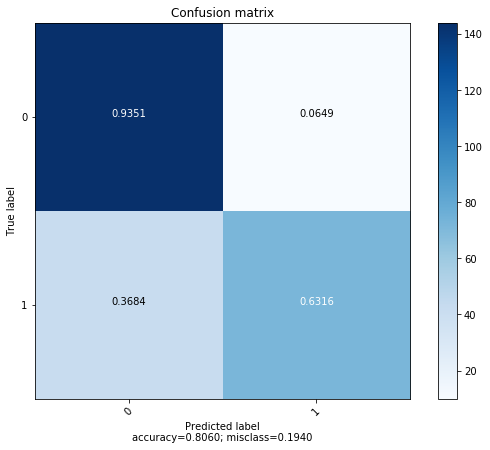

In [35]:
pred_rf = random_forest_best.predict(x_test)
cm = confusion_matrix(y_test, pred_rf)

plot_confusion_matrix(cm,[0,1],title='Confusion matrix',cmap=None,normalize=True)

## 3.3.2 XGBoost

In [36]:
# XGBoost
xgbc = XGBClassifier()
rf_param_grid = {
    'max_depth': [3,5,7,10,20,30,40,50,60,100],
    'subsample': [0.4,0.5,0.6,0.7,0.8],
    'colsample_bytree': [0.5,0.6,0.7,0.8],
    'n_estimators': [1000,2000,3000],
    'reg_alpha': [0.01,0.02,0.03,0.04]
}
gsxgboost = RandomizedSearchCV(xgbc,rf_param_grid,n_iter=30, cv=3, scoring="accuracy", n_jobs= -1, verbose = 1)
gsxgboost.fit(X_train.values,Y_train.values)
# Best score
xgboost_best = gsxgboost.best_estimator_
gsxgboost.best_score_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.3s finished


0.8202247191011236

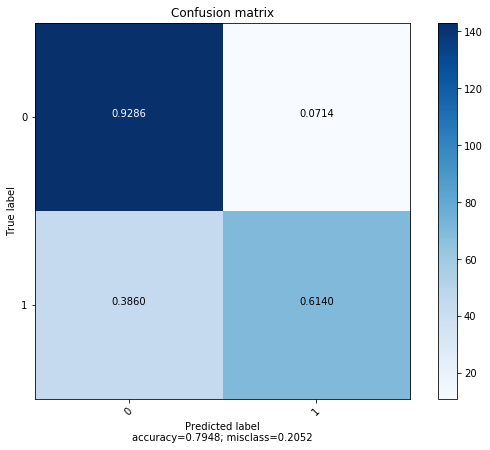

In [37]:
pred = xgboost_best.predict(x_test.values)
cm = confusion_matrix(y_test.values, pred)

plot_confusion_matrix(cm,[0,1],title='Confusion matrix',cmap=None,normalize=True)

## 3.4 Feature Importance

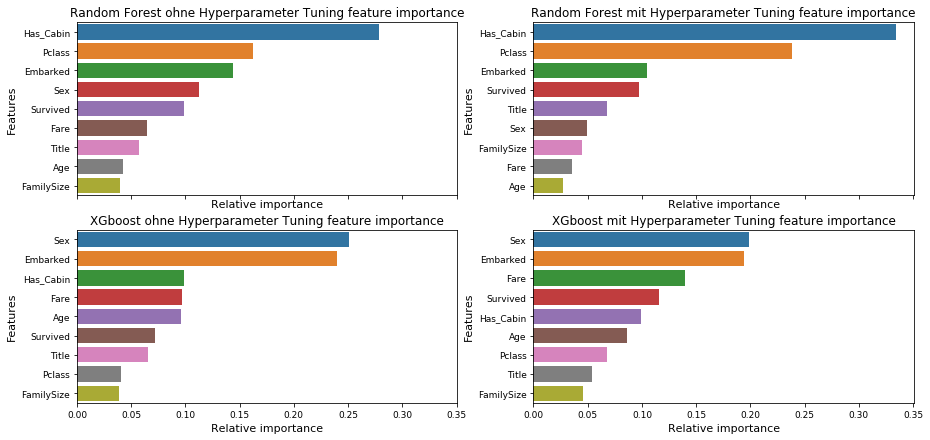

In [38]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,7))
names_classifiers = [("Random Forest ohne Hyperparameter Tuning", random_forest),("Random Forest mit Hyperparameter Tuning",random_forest_best),
("XGboost ohne Hyperparameter Tuning",xgboost_m),("XGboost mit Hyperparameter Tuning",xgboost_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=11)
        g.set_ylabel("Features",fontsize=11)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

# 4. Erstellung submission file

In [39]:
test_Survived = pd.Series(random_forest_best.predict(X_test), name="Survived")
Submission = pd.concat([PassengerId,test_Survived],axis=1)
Submission.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [40]:
# Submit File 
Submission.to_csv("StackingSubmission.csv", index=False)
print("Completed.")

Completed.


# 5. Speichern eines Modells

In [41]:
pickle.dump(random_forest_best, open('rf.pkl', 'wb'))

loaded_model = pickle.load(open('rf.pkl', 'rb'))